In [147]:
# 농수축 & 이미용 EDA
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [164]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('c:/bc/base_line.xlsx', header=0)

Not running on CoLab


In [165]:
pd.options.display.max_rows = 100
df.exp_min.fillna(0, inplace=True)
df['code2'] = pd.factorize(df.p_group)[0]

In [166]:
index_total = df[df['total_price']==50000].index
df.drop(index_total,inplace=True)

In [167]:
df.reset_index(drop=True, inplace=True)

In [170]:
df.to_excel('test_ori_df.xlsx')

In [171]:
idx_dict = {'start':0, 'end':0}
idx = 0

for row in tqdm(range(df.shape[0]-1)):
    current_day = df.loc[row]['DAY']
    next_day = df.loc[row+1]['DAY']
    
    current_group = df.loc[row+1]['p_group']
    next_group = df.loc[row+1]['p_group']
    
    current_mcode = df.loc[row]['m_code']
    next_mcode = df.loc[row+1]['m_code']
    if row == 293:
        break
    if ((current_day == next_day)  and (current_group == next_group)) and (abs(current_mcode - next_mcode) < 5):
        pass
    else:
        idx_dict['end'] = row + 1
        df['code2'][idx_dict['start']:idx_dict['end']] = idx
        idx += 1
        idx_dict['start'] = idx_dict['end']
        print(row, idx)
#         print(idx_dict['start'],idx_dict['end'])
idx_dict['end'] = row + 2
df['code2'][idx_dict['start']:idx_dict['end']] = idx


C:\Users\user\anaconda3\envs\mulcam\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5 1
8 2
11 3
14 4
17 5
19 6
22 7
24 8
28 9
31 10
33 11
34 12
37 13
40 14
43 15
49 16
52 17
54 18
57 19
63 20
66 21
69 22
72 23
75 24
78 25
90 26
92 27
104 28
107 29
109 30
112 31
118 32
121 33
124 34
127 35
136 36
142 37
154 38
157 39
161 40
164 41
170 42
173 43
176 44
179 45
181 46
184 47
187 48
190 49
193 50
205 51
208 52
211 53
214 54
223 55
226 56
240 57
243 58
249 59
252 60
255 61
258 62
261 63
264 64
276 65
287 66
289 67



C:\Users\user\anaconda3\envs\mulcam\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [178]:
df.loc[290:295]

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,no,code2
290,2019-01-04 12:00:00,20.0,100253,200864,안동간고등어 20팩,농수축,30900,30671000,993,2019,...,4,12,0,0,2019-01-04,Friday,5,67,290,67
291,2019-01-04 12:20:00,20.0,100253,200864,안동간고등어 20팩,농수축,30900,44792000,1450,2019,...,4,12,20,0,2019-01-04,Friday,5,67,291,67
292,2019-01-04 12:40:00,20.0,100253,200864,안동간고등어 20팩,농수축,30900,50049000,1620,2019,...,4,12,40,0,2019-01-04,Friday,5,67,292,67
293,2019-01-04 13:00:00,20.0,100255,200868,한일 대용량 스텐 분쇄믹서기,주방,109800,17529000,160,2019,...,4,13,0,0,2019-01-04,Friday,5,67,293,67
294,2019-01-04 13:20:00,20.0,100255,200868,한일 대용량 스텐 분쇄믹서기,주방,109800,31775000,289,2019,...,4,13,20,0,2019-01-04,Friday,5,67,294,67
295,2019-01-04 13:40:00,20.0,100255,200868,한일 대용량 스텐 분쇄믹서기,주방,109800,42918000,391,2019,...,4,13,40,0,2019-01-04,Friday,5,67,295,2


In [155]:
df_sum = df[['exp_min','total_price','sales','code2']].groupby(by='code2').sum()
df_mean = df[['unit_price','YEAR','MONTH','DAY','HOUR','MINUTE','DAY_NUM','code2']].groupby(by='code2').mean()
df_temp = pd.merge(df_mean,df_sum,on='code2',how='left')
df_name = df[['code2','p_name']].groupby(by='code2').max()
df_broad = df[['code2','broadcast']].groupby(by='code2').min()
df_short = pd.merge(df_name,df_temp,on='code2',how='left')
df_short = pd.merge(df_short,df_broad,on='code2',how='left')
df_short['p_group'] = 0

df_short["YEAR"] = df_short['broadcast'].dt.year
df_short["MONTH"] = df_short['broadcast'].dt.month
df_short["DAY"] = df_short['broadcast'].dt.day
df_short["HOUR"] = df_short['broadcast'].dt.hour
df_short["MINUTE"] = df_short['broadcast'].dt.minute
df_short['DAY_NUM'] = df_short['broadcast'].dt.weekday+1

In [163]:
df.to_excel('test_df_short3.xlsx',index=False)

In [161]:
df_short.to_excel('test_df_short2.xlsx',index=False)

In [146]:
df_short.exp_min.describe()

count    6859.000000
mean       59.635151
std         9.174046
min         0.000000
25%        60.000000
50%        60.000000
75%        60.000000
max       150.000000
Name: exp_min, dtype: float64

C:\Users\user\anaconda3\envs\mulcam\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\mulcam\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


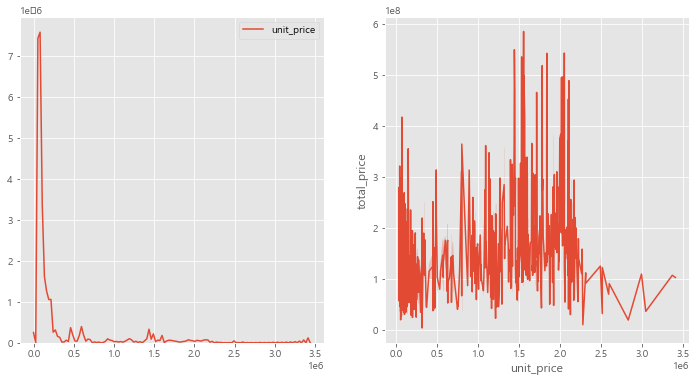

In [132]:
f, ax = plt.subplots(1,2, figsize=(12,6))
sns.kdeplot(df_short.unit_price, ax = ax[0])
sns.lineplot(x=df_short.unit_price,y=df_short.total_price, ax = ax[1])

In [135]:
sorted_unit = sorted(df_short.unit_price)
len(sorted_unit)

6859

In [145]:
df_short.sort_values('unit_price')

,p_name,unit_price,YEAR,MONTH,DAY,HOUR,MINUTE,DAY_NUM,exp_min,total_price,sales,broadcast,p_group
code2,,,,,,,,,,,,,
2684,보코 썸머 풀코디 2종,2.900000e+04,2019,5,21,14,0,2,60.000000,57755000,1992,2019-05-21 14:00:00,0
4570,NNF SS트레이닝 세트(8월),2.900000e+04,2019,8,28,9,0,3,60.000000,122214000,4214,2019-08-28 09:00:00,0
3616,오델로 여성 모자 3종,2.900000e+04,2019,7,9,7,0,2,60.000000,109712000,3782,2019-07-09 07:00:00,0
4580,NNF SS트레이닝 세트(8월),2.900000e+04,2019,8,28,19,0,3,60.000000,92370000,3185,2019-08-28 19:00:00,0
4173,AAD 소가죽 투웨이 샌들,2.900000e+04,2019,8,7,9,0,3,60.000000,92695000,3196,2019-08-07 09:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,(일)이누스바스 시공패키지,2.831000e+06,2019,11,12,1,40,2,37.166667,20132000,7,2019-11-12 01:40:00,0
2673,일)이누스바스 시공패키지,2.992500e+06,2019,5,20,23,0,1,60.000000,110135000,39,2019-05-20 23:00:00,0
3079,일)이누스바스 시공패키지,3.045000e+06,2019,6,10,0,20,1,40.000000,37088000,13,2019-06-10 00:20:00,0


In [59]:
print(6856/5,6856/5*2,6856/5*3,6856/5*4,6856/5*5)

1371.2 2742.4 4113.6 5484.8 6856.0


In [137]:
np.linspace(0,6856,10)

array([   0.        ,  761.77777778, 1523.55555556, 2285.33333333,
       3047.11111111, 3808.88888889, 4570.66666667, 5332.44444444,
       6094.22222222, 6856.        ])

In [76]:
d1,d2,d3,d4,d5,_ = np.split(sorted_sales,[1372,1372*2,1372*3,1372*4,(1372*5)-1])

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

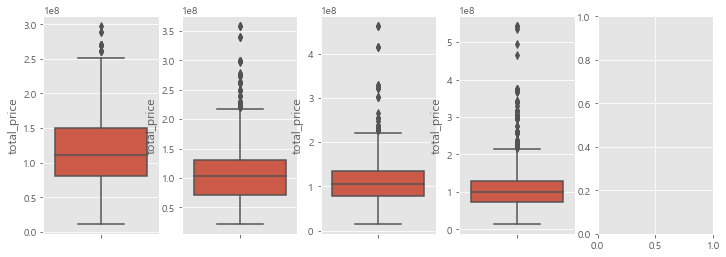

In [114]:
fig, axes = plt.subplots(1,5, figsize=(12,4))

sns.boxplot(y=df_short.total_price[d1], data=df_short,ax=axes[0])
sns.boxplot(y=df_short.total_price[d2], data=df_short,ax=axes[1])
sns.boxplot(y=df_short.total_price[d3], data=df_short,ax=axes[2])
sns.boxplot(y=df_short.total_price[d4], data=df_short,ax=axes[3])
sns.boxplot(y=df_short.total_price[d5], data=df_short,ax=axes[4])

In [130]:
d5

array([2530, 2530, 2531, ..., 9364, 9372, 9937])

In [119]:
df_short.total_price[d4]

code2
1632     71148000
1633     99461000
1633     99461000
1634    101201000
1634    101201000
          ...    
2528     25205000
2528     25205000
2528     25205000
2528     25205000
2529     49128000
Name: total_price, Length: 1372, dtype: int64

In [120]:
d5

array([2530, 2530, 2531, ..., 9364, 9372, 9937])

In [128]:
df_short.total_price

code2
0        32696000
1        47878000
2        99736000
3        90973000
4       259678000
          ...    
6854    201322000
6855    102360000
6856    191710000
6857    222022000
6858    268596000
Name: total_price, Length: 6859, dtype: int64

In [129]:
df_short.total_price[6858]

268596000

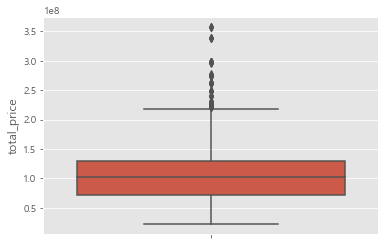

In [98]:
sns.boxplot(y=df_short.total_price[d2], data=df_short)


In [131]:
df_short.sales.sort_values()

code2
4169       6
5985       7
4118      12
3079      13
3265      13
        ... 
6183    8712
6748    9178
6293    9364
6554    9372
5941    9937
Name: sales, Length: 6859, dtype: int64